# Project: Investigating The Movie Database Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### For this project, we investigate a dataset listing movies from The Movie Database.  This dataset contains over 10,000 entries, including movie titles, movie budgets, year of release, cast members, directors, and user ratings.  We will use Python functionality to extract this data and share the findings.  Among the issues:
<UL>
    <LI>Which movies had the most profit at the box office?  Which movies had the least profit?</LI>
    <LI>Which movies had the large budget?  Which movies had a small budget?</LI>
    <LI>Which movies achieved a high return on investment (i.e., revenue)?  Which movies achieved a low return on investment?</LI>
    <LI>Which movies had the longest runtime?  Which movies had the shortest?</LI>
    <LI>Which year brought the most profit for the box office?</LI>
    <LI>Which movie genre was the most successful?</LI>
    <LI>What is the average budget, revenue, and runtime for the movies?</LI>
        </UL>

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#import the required libraries (pandas, numpy, matplotlib)
import pandas as pd
import numpy as np
import csv
import pprint
from datetime import datetime
import matplotlib.pyplot as plt

#including the 'magic word' so that our visualizations are plotted
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

After observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevant data and deleting unused data.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#import dataset from The Movie Database
dfmovies = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')

#obtain some initial information about the columns
dfmovies.info()

#print out first five entries
dfmovies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#print out last five entries
dfmovies.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### Initial Observations:
<OL>
    <LI>There is no unit of currency for the following columns:  'budget', 'revenue', 'budget_adj', revenue_adj'.  For purposes related to this project, we will presume that the unit of currency is US dollar.</LI>
    <LI>In relation to the first point, some values in the dataset (e.g., 'budget', 'revenue') contain a value of 0.  Either the data was unavailable for those movies or they're simply not correct.</LI>
    <LI>Vote count is not similar for all the movies and not consistent with the budget allocated or revenue earned.  The vote count varies widely and affects the vote average.  Some movies have a higher rating, but their box office take was much less than what the rating suggested.  Other movies had a lower rating, and their box office take was much higher.</LI>
</OL>

### Data Cleaning (Removing irrelevant data from the dataset)

<h3>1.  Remove unused columns in the dataset.</h3>

The columns we're removing are:  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count, vote_average

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#delete columns that are irrelevant to our investigation
these_columns=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#use drop to delete the columns
dfmovies = dfmovies.drop(these_columns, 1)

#previewing the new dataset
dfmovies.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


<h3>2.  Remove duplicate rows (if any).</h3>

In [6]:
#Use the shape command to measure the dimensions of the dataset
rows, columns = dfmovies.shape

#Print out the values of the dataset
print('Total number of entries: {}\nTotal number of columns: {}'.format(rows-1, columns))

Total number of entries: 10865
Total number of columns: 10


In [7]:
#Search for duplicate rows and remove them
dfmovies.drop_duplicates(keep ='first', inplace=True)

#Use the shape command to measure the dimensions of the dataset
rows, columns = dfmovies.shape

#Print out the values of the dataset
print('Total number of entries: {}\nTotal number of columns: {}'.format(rows-1, columns))

Total number of entries: 10864
Total number of columns: 10


<h3>3.  Change format of release date</h3>

The release date is interpreted as a string format.  We want to change this to a standard date format.

In [8]:
#Change the existing date format from string to standard
dfmovies.release_date = pd.to_datetime(dfmovies['release_date'])

#Print the dataset with the updated date format
dfmovies.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [9]:
#Verify that the dataset has the correct data types
#release_date should have had its data type changed
dfmovies.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<h3>4.  Replace runtime values</h3>

Search for any movie whose runtime is 0.  It does not make sense for a movie to have a runtime of 0, so let's replace those values with the standard NaN.

In [10]:
#Replace 0 with NaN for runtime column of the dataframe
dfmovies['runtime'] = dfmovies['runtime'].replace(0, np.NaN)

<h3>5.  Removing 0 from budget and revenue columns</h3>

Search for any movie whose budget and/or revenue is 0 and remove 0.

In [11]:
#Isolate the budget and revenue columns, put them under the variable zerolist
zerolist=['budget', 'revenue']

#Replace 0 with NaN
dfmovies[zerolist] = dfmovies[zerolist].replace(0, np.NAN)

#Remove all NaN from the list
dfmovies.dropna(subset = zerolist, inplace = True)

#Use the shape command to measure the dimensions of the dataset
#Print out the number of entries in the dataset
rows, columns = dfmovies.shape
print('Dataset cleaned!  Total number of entries: {}'.format(rows-1))

Dataset cleaned!  Total number of entries: 3853


<h3>6.  Change format of budget and revenue columns</h3>

Change the current data types of budget and revenue from float to int

In [12]:
change_type=['budget', 'revenue']

#changing data type
dfmovies[change_type]=dfmovies[change_type].applymap(np.int64)

#printing the changed information
dfmovies.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which movies had the most profit at the box office? Which movies had the least profit?

To answer this question, first we have to calculate the profit of each movie:

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#insert a new column, profit, and calculate the difference between the
#revenue and budget columns to populate the new column
#(Note that this can only be run once)
dfmovies.insert(2, 'profit', dfmovies['revenue']-dfmovies['budget'])

#Display the newly modified dataset
dfmovies.head()

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,2015-04-01,2015


Next we create a function that will extract the maximum and minimum values, then calculate the results.

In [14]:
#Define a function called calculate, to calculate the movies that had
#the most profit and least profit at the box office
def calculate(column):
    #For most values
    most=dfmovies[column].idxmax()
    most_values=pd.DataFrame(dfmovies.loc[most])
    
    #For least values
    least=dfmovies[column].idxmin()
    least_values=pd.DataFrame(dfmovies.loc[least])
    
    #Collect the values for most and least
    info=pd.concat([most_values, least_values], axis=1)
    
    #Return the results
    return info

#Call the function calculate and display the results
calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


Column 1386 had the most profit; column 2244 had the least profit.

### Research Question 2:  Which movies had the large budget? Which movies had a small budget?

In [15]:
#Call the calculate function again to display the results
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


Column 2244 had the most budget; column 2618 had the least budget.

### Research Question 3:  Which movies achieved a high return on investment (i.e., revenue)? Which movies achieved a low return on investment?

In [16]:
#Call the calculate function again to display the results
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


Column 1386 had the most revenue; column 5067 had the least revenue.

### Research Question 4:  Which movies had the longest runtime? Which movies had the shortest?

In [17]:
#Call the calculate function again to display the results
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


Column 2107 had the longest runtime; column 5162 had the shortest runtime.

### Research Question 5:  Which year brought the most profit for the box office?

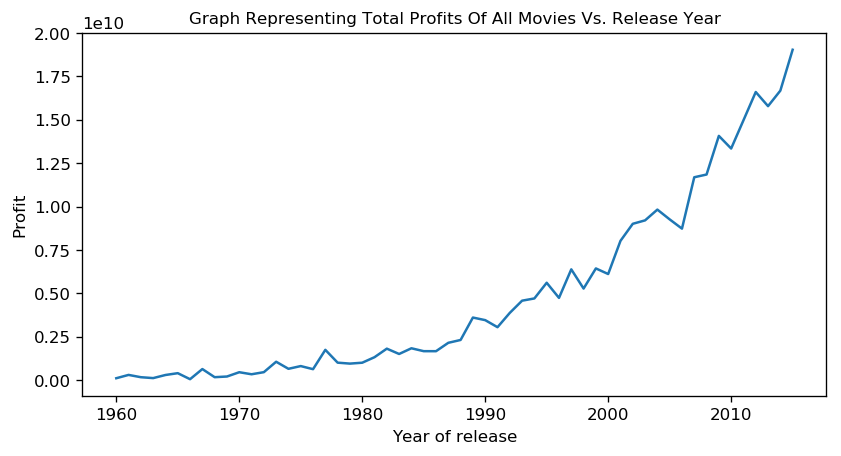

The most profitable year for the box office is:  2015
The least profitable year for the box office is:  1966


In [18]:
#For this analysis, we will create a graph comparing the years with movie profits for each of those years
year_vs_profits = dfmovies.groupby('release_year')['profit'].sum()

#Create the size of the graph
plt.figure(figsize=(8,4), dpi = 120)

#Plot the X-Axis
plt.xlabel('Year of release', fontsize = 10)

#Plot the Y-Axis
plt.ylabel('Profit', fontsize = 10)

#Print the Graph Title
plt.title('Graph Representing Total Profits Of All Movies Vs. Release Year', fontsize=10)

#Display the graph itself
plt.plot(year_vs_profits)
plt.show()

#Print the year that had the most profit
print('The most profitable year for the box office is: ', year_vs_profits.idxmax())
print('The least profitable year for the box office is: ', year_vs_profits.idxmin())

### Research Question 6:  Which movie genre was the most successful?

In [19]:
#Select the movies whose profit exceeded $50 million
movie_profits = dfmovies[dfmovies['profit'] >= 50000000]

#Reindex data
movie_profits.index = range(len(movie_profits))
movie_profits.index = movie_profits.index + 1

In [20]:
#Define a function that separates the movie data
def moviedata(column):
    #Parse the column string with a delimiter ('|') character
    moviedata = movie_profits[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    moviedata = pd.Series(moviedata.split('|'))
    
    #arranging in descending order
    count = moviedata.value_counts(ascending = False)
    
    return count

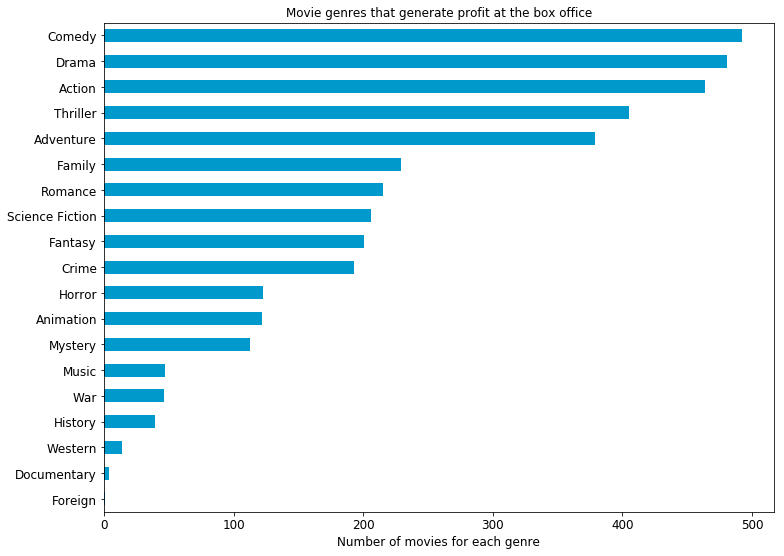

The movie genre that generated the most profit at the box office was:  Comedy
The movie genre that generated the least profit at the box office was:  Foreign


In [24]:
#Capture all the genres from the movie dataset in all_genres
all_genres = moviedata('genres')

#Plot the points in descending order top to bottom
all_genres.sort_values(ascending = True, inplace = True)

#Plot the actual graph.  We will use a bar graph for this.
bar_graph = all_genres.plot.barh(color='#0099CC', fontsize = 12)

#Graph title
bar_graph.set(title = 'Movie genres that generate profit at the box office')

#Plot the X-Axis
bar_graph.set_xlabel('Number of movies for each genre', color = 'black', fontsize = '12')

#Create the size of the graph
bar_graph.figure.set_size_inches(12, 9)

#Display the graph itself
plt.show()

#Display the results
print('The movie genre that generated the most profit at the box office was: ', all_genres.idxmax())
print('The movie genre that generated the least profit at the box office was: ', all_genres.idxmin())

### Research question 7:  What is the average budget, revenue, and runtime for the movies?

In [21]:
#Define a function called the_averages and get the mean data for
#the columns budget, revenue, and runtime
def the_averages(column):
    return movie_profits[column].mean()

#Display the results
print('Average movie budget: ', the_averages('budget'))
print('Average movie revenue: ', the_averages('revenue'))
print('Average movie runtime: ', the_averages('runtime'))

Average movie budget:  60444957.7608
Average movie revenue:  254957662.595
Average movie runtime:  113.667414051


<a id='conclusions'></a>
## Conclusions

<UL>Summary of The Movie Database data analysis<BR><BR>
    <LI>2015 was the most profitable year for movies</LI>
    <LI>The movie "Avatar" generated revenue of 2.78 billion dollars on a budget of 237 million dollars</LI>
    <LI>The largest movie budget is 425 million dollars</LI>
    <LI>The most popular movie genre is comedy</LI>
    <LI>The longest movie runtime is 338 minutes</LI>
    <LI>The average movie budget is 60 million dollars (for all the movies analyzed in this dataset)</LI>
    <LI>The average movie revenue is 255 million dollars</LI>
    <LI>The average movie runtime is 114 minutes</LI>
</UL>

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0